<a href="https://colab.research.google.com/github/aisha-partha/AIMLOps-MiniProjects/blob/mp_2/M1_NB_MiniProject_2_Structured_Data_Classification_Aishwarya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Programme in AI and MLOps
## A programme by IISc and TalentSprint
### Mini-Project Notebook: Structured Data Classification

## Problem Statement

To predict whether a patient has a heart disease.

## Learning Objectives

At the end of the experiment, you will be able to

* Understand the Cleveland Clinic Foundation Heart Disease dataset
* Pre-process this dataset using Keras layers: IntegerLookup, StringLookup & Normalization
* Understand and use Keras concatenate layer
* Build a neural network model and architecture using Keras functional api
* Predict an unseen data

## Introduction

This example demonstrates how to do structured data classification, starting from a raw
CSV file. Our data includes both numerical and categorical features. We will use Keras
preprocessing layers to normalize the numerical features and vectorize the categorical
ones.

Note that this example should be run with TensorFlow 2.5 or higher.

## Dataset

[Our dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) is provided by the
Cleveland Clinic Foundation for Heart Disease.
It's a CSV file with 303 rows. Each row contains information about a patient (a
**sample**), and each column describes an attribute of the patient (a **feature**). We
use the features to predict whether a patient has a heart disease (**binary
classification**).

Here's the description of each feature:
<br><br>

Column| Description| Feature Type
------------|--------------------|----------------------
Age | Age in years | Numerical
Sex | (1 = male; 0 = female) | Categorical
CP | Chest pain type (0, 1, 2, 3, 4) | Categorical
Trestbpd | Resting blood pressure (in mm Hg on admission) | Numerical
Chol | Serum cholesterol in mg/dl | Numerical
FBS | fasting blood sugar in 120 mg/dl (1 = true; 0 = false) | Categorical
RestECG | Resting electrocardiogram results (0, 1, 2) | Categorical
Thalach | Maximum heart rate achieved | Numerical
Exang | Exercise induced angina (1 = yes; 0 = no) | Categorical
Oldpeak | ST depression induced by exercise relative to rest | Numerical
Slope | Slope of the peak exercise ST segment | Numerical
CA | Number of major vessels (0-3) colored by fluoroscopy | Both numerical & categorical
Thal | 3 = normal; 6 = fixed defect; 7 = reversible defect | Categorical
Target | Diagnosis of heart disease (1 = true; 0 = false) | Target

<br><br>

In [1]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/AIandMLOps/Datasets/heart.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


## Grading = 10 Points

### Import Required Packages

In [29]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import IntegerLookup     # Used in Feature processing
from tensorflow.keras.layers import Normalization     # Used in Feature processing
from tensorflow.keras.layers import StringLookup      # Used in Feature processing


import matplotlib.pyplot as plt

# Part A

## Load the data and create batches [2 Marks]

### Load data into a Pandas dataframe

Hint:: pd.read_csv

In [3]:
file_url = "/content/heart.csv"
## YOUR CODE HERE
raw_df = pd.read_csv(file_url)

Check the shape of the dataset:

In [4]:
## YOUR CODE HERE
raw_df.shape

(303, 14)

Check the preview of a few samples:

Hint:: head()

In [5]:
## YOUR CODE HERE
raw_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


Draw some inference from the data. What does the target column indicate?

The last column, "target", indicates whether the patient has a heart disease (1) or not
(0).


Additonal Observations on dataset:

*   No missing values
*   27% positive class samples in dataset



In [7]:
#Check the percentage of target samples
print(raw_df['target'].value_counts())

print(raw_df['target'].value_counts(normalize=True))

target
0    220
1     83
Name: count, dtype: int64
target
0    0.726073
1    0.273927
Name: proportion, dtype: float64


### Split the data into a training and validation set

Hint:: Use .sample() method from Pandas.

Refer to link [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html)

Official reference from pandas for drop method [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [8]:
## YOUR CODE HERE
## YOUR CODE HERE

#80 : 20 split or 70:30 split?

#Using sample function over groupby to perform stratified sampling
train_dataframe = raw_df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=0.8, random_state=42))
val_dataframe = raw_df[~raw_df.index.isin(train_dataframe.index)]

print(
    "Using %d samples for training and %d for validation"
    % (len(train_dataframe), len(val_dataframe))
)

Using 242 samples for training and 61 for validation


In [9]:
print("Proportion of target class in training dataset")
print(train_dataframe['target'].value_counts(normalize=True))

print("Proportion of target class in validation dataset")
print(val_dataframe['target'].value_counts(normalize=True))

Proportion of target class in training dataset
target
0    0.727273
1    0.272727
Name: proportion, dtype: float64
Proportion of target class in validation dataset
target
0    0.721311
1    0.278689
Name: proportion, dtype: float64


### Converting into tensorflow dataset & creating batches

Generate `tf.data.Dataset` objects for each dataframe:

Each `Dataset` yields a tuple `(input, target)` where `input` is a dictionary of features
and `target` is the value `0` or `1`:

Refer [here](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#from_tensor_slices) to create the tuple using tensorflow.

In [10]:
cols_list = list(raw_df.columns)
features = cols_list[0:-1]
target = cols_list[-1]

print('List of features: ', features)
print('Target: ', target)

List of features:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Target:  target


In [11]:
# A utility method to create a tf.data dataset from a Pandas Dataframe

def dataframe_to_dataset(dataframe):
    ## YOUR CODE HERE
    dataframe = dataframe.copy()
    labels = dataframe.pop('target')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    return ds

train_ds = dataframe_to_dataset(train_dataframe)
val_ds = dataframe_to_dataset(val_dataframe)



print('Sample rows from train ds')
for row in train_ds.take(3):
  print(row)


print('----------------------------------------------------')
print('Sample rows from val ds')
for row in val_ds.take(3):
    print(row)

Sample rows from train ds
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=152>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=277>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'restecg': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=172>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'normal'>}, <tf.Tensor: shape=(), dtype=int64, numpy=0>)
({'age': <tf.Tensor: shape=(), dtype=int64, numpy=64>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=4>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, nump

In [12]:
# Visualizing one datapoint from the formatted data
## YOUR CODE HERE
print('Sample datapoint from train_ds\n')

for feature_batch, label_batch in train_ds.take(1):
  print('Every feature:', list(feature_batch.keys()))
  print('A batch:', feature_batch)
  print('A batch of targets:', label_batch )




Sample datapoint from train_ds

Every feature: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
A batch: {'age': <tf.Tensor: shape=(), dtype=int64, numpy=67>, 'sex': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'cp': <tf.Tensor: shape=(), dtype=int64, numpy=3>, 'trestbps': <tf.Tensor: shape=(), dtype=int64, numpy=152>, 'chol': <tf.Tensor: shape=(), dtype=int64, numpy=277>, 'fbs': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'restecg': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'thalach': <tf.Tensor: shape=(), dtype=int64, numpy=172>, 'exang': <tf.Tensor: shape=(), dtype=int64, numpy=0>, 'oldpeak': <tf.Tensor: shape=(), dtype=float64, numpy=0.0>, 'slope': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'ca': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'thal': <tf.Tensor: shape=(), dtype=string, numpy=b'normal'>}
A batch of targets: tf.Tensor(0, shape=(), dtype=int64)


#### Create the batch of the datasets:

Refer [here](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) to create a batch using tensorflow.

In [13]:
'''
batch function
batch(
    batch_size,
    drop_remainder=False,
    num_parallel_calls=None,
    deterministic=None,
    name=None
)

'''
### - Size of batch ??
## YOUR CODE HERE  ## For train
#train_ds = train_ds.unbatch()
batch_size = 5


train_ds = train_ds.batch(batch_size)
train_ds= train_ds.prefetch(batch_size)
result = list(train_ds.as_numpy_iterator())
print(result)
print('-----------------------------------------')

## YOUR CODE HERE  ## For val
#val_ds = val_ds.unbatch()
val_ds = val_ds.batch(batch_size)
val_ds = val_ds.prefetch(batch_size)
result = list(val_ds.as_numpy_iterator())
print(result)

[({'age': array([67, 64, 62, 57, 49]), 'sex': array([0, 1, 0, 0, 1]), 'cp': array([3, 4, 4, 2, 2]), 'trestbps': array([152, 128, 140, 130, 130]), 'chol': array([277, 263, 394, 236, 266]), 'fbs': array([0, 0, 0, 0, 0]), 'restecg': array([0, 0, 2, 2, 0]), 'thalach': array([172, 105, 157, 174, 171]), 'exang': array([0, 1, 0, 0, 0]), 'oldpeak': array([0. , 0.2, 1.2, 0. , 0.6]), 'slope': array([1, 2, 2, 2, 1]), 'ca': array([1, 1, 0, 1, 0]), 'thal': array([b'normal', b'reversible', b'normal', b'normal', b'normal'],
      dtype=object)}, array([0, 0, 0, 0, 0])), ({'age': array([43, 56, 52, 60, 49]), 'sex': array([1, 1, 1, 0, 0]), 'cp': array([4, 2, 2, 3, 4]), 'trestbps': array([110, 130, 134, 102, 130]), 'chol': array([211, 221, 201, 318, 269]), 'fbs': array([0, 0, 0, 0, 0]), 'restecg': array([0, 2, 0, 0, 0]), 'thalach': array([161, 163, 158, 160, 163]), 'exang': array([0, 0, 0, 0, 0]), 'oldpeak': array([0. , 0. , 0.8, 0. , 0. ]), 'slope': array([1, 1, 1, 1, 1]), 'ca': array([0, 0, 1, 1, 0]),

## Feature preprocessing with Keras layers [3 Marks]

### Categorical Features Encoding

The following features are categorical features encoded as integers:

- `sex`
- `cp`
- `fbs`
- `restecg`
- `exang`
- `ca`

In [ ]:
#Sex

We will encode these features using **one-hot encoding**. We have two options
here:

 - Use `CategoryEncoding()`, which requires knowing the range of input values
 and will throw an error on input outside the range.
 - Use `IntegerLookup()` which will build a lookup table for inputs and **reserve
 an output index for unkown input values**.

For this example, we want a simple solution that will handle out of range inputs
at inference, so we will use `IntegerLookup()`.

We also have a categorical feature encoded as a string: `thal`. We will create an
index of all possible features and encode output using the `StringLookup()` layer.

Create a function `encode_categorical_feature`, this function takes four parameters.
1. Feature to be encoded.
2. Name of the feature in the dataset.
3. Dataset containing the feature.
4. A boolean value wether the feature is string or not.

**Refer :** StringLookup [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/StringLookup) and IntegerLookup [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/IntegerLookup).

In [14]:
def encode_categorical_feature(feature, name, dataset, is_string):

    #vocab = sorted(set(dataset[feature]))
    #print(f'name: {name}')
    #print(f'vocab: {vocab}\n')
    ## YOUR CODE HERE
    # Create a lookup layer which will turn strings into integer indices
    ## YOUR CODE HERE
    if is_string:
        lookup = tf.keras.layers.StringLookup(output_mode='one_hot')
    else:
        lookup = tf.keras.layers.IntegerLookup(output_mode='one_hot')
    # Prepare a Dataset that only yields our feature
    ## YOUR CODE HERE

    feature_ds = dataset.map(lambda x, y: x[name]) #extract the column out from the tensor
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) #expand the dimensions since the adapt() assumes each row to be a sample

    # Learn the set of possible string values and assign them a fixed integer index
    ## YOUR CODE HERE
    # if using vocab no need to use adapt
    lookup.adapt(feature_ds)

    # Turn the string input into integer indices
    ## YOUR CODE HERE
    encoded_feature = lookup(feature)
    return encoded_feature


### Numerical features Normalization
The following feature are continuous numerical features:

- `age`
- `trestbps`
- `chol`
- `thalach`
- `oldpeak`
- `slope`

For each of these features, we will use a `Normalization()` layer to make sure the mean
of each feature is 0 and its standard deviation is 1.


- Define a function `encode_numerical_feature` to apply featurewise normalization to numerical features.


Refer Normalization [here](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization)

In [15]:
def encode_numerical_feature(feature, name, dataset):
    # Create a Normalization layer for our feature
    ## YOUR CODE HERE
    normalizer = layers.Normalization()
    # Prepare a Dataset that only yields our feature
    ## YOUR CODE HERE
    feature_ds = dataset.map(lambda x, y: x[name])
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1))

    # Learn the statistics of the data
    ## YOUR CODE HERE
    normalizer.adapt(feature_ds)

    # Normalize the input feature
    ## YOUR CODE HERE
    encoded_feature = normalizer(feature)
    return encoded_feature

# Part B

## Building the model [4 Marks]

#### Need to instantiate a Keras tensor for all features
 Use keras Input() [method](https://keras.io/api/layers/core_layers/input/).
* Create a list of inputs to be fed to the model.
* This list consists of the features output from keras Input() method.
* These inputs include all the features.


In [16]:
# Categorical features encoded as integers
## YOUR CODE HERE
sex = keras.Input(shape=(1,), name="sex", dtype="int64")
cp = keras.Input(shape=(1,), name="cp", dtype="int64")
fbs = keras.Input(shape=(1,), name="fbs", dtype="int64")
restecg = keras.Input(shape=(1,), name="restecg", dtype="int64")
exang = keras.Input(shape=(1,), name="exang", dtype="int64")
ca = keras.Input(shape=(1,), name="ca", dtype="int64")

# Categorical feature encoded as string
## YOUR CODE HERE
thal = keras.Input(shape=(1,), name="thal", dtype="string")

# Numerical features
## YOUR CODE HERE
age = keras.Input(shape=(1,), name="age", dtype='int64')
trestbps = keras.Input(shape=(1,), name="trestbps", dtype='int64')
chol = keras.Input(shape=(1,), name="chol", dtype='int64')
thalach = keras.Input(shape=(1,), name="thalach", dtype='int64')
oldpeak = keras.Input(shape=(1,), name="oldpeak", dtype='int64')
slope = keras.Input(shape=(1,), name="slope", dtype='int64')



## These list of inputs objects are fed inside the model as inputs
all_inputs = [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal ]

### Encoding above features
Use  "encode_categorical_feature" & "encode_numerical_feature" function on respective features that we defined above.

In [22]:
# Integer categorical features
sex_encoded = encode_categorical_feature(sex,"sex", train_ds, False)
cp_encoded = encode_categorical_feature(cp,"cp", train_ds, False)
fbs_encoded = encode_categorical_feature(fbs,"fbs", train_ds, False)
restecg_encoded = encode_categorical_feature(restecg,"restecg", train_ds, False)
exang_encoded = encode_categorical_feature(exang,"exang", train_ds, False)
ca_encoded = encode_categorical_feature(ca,"ca", train_ds, False)

# String categorical features
thal_encoded = encode_categorical_feature(thal,"thal", train_ds, True)

# Numerical features
age_encoded = encode_numerical_feature(age, "age", train_ds)
trestbps_encoded = encode_numerical_feature(trestbps, "trestbps", train_ds)
chol_encoded = encode_numerical_feature(chol, "chol", train_ds)
thalach_encoded = encode_numerical_feature(thalach, "thalach", train_ds)
oldpeak_encoded = encode_numerical_feature(oldpeak, "oldpeak", train_ds)
slope_encoded = encode_numerical_feature(slope, "slope", train_ds)

##### Understanding the result of  encoder functions

In [18]:
#sex_encoded = ## YOUR CODE HERE
print(sex_encoded)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='integer_lookup/bincount/DenseBincount:0', description="created by layer 'integer_lookup'")


In [19]:
#cp_encoded = ## YOUR CODE HERE
cp_encoded

<KerasTensor: shape=(None, 6) dtype=float32 (created by layer 'integer_lookup_1')>

### Using Functional API for building model
Build the three model architectures with 1, 2, and 3 hidden layers having different numbers of neurons. Train for each architecture and compare the train and the validation accuracy.

* These inputs will be passed to keras.model.
* Concatenate the encoded features using layers.concatenate()
* Add the Dense layers and compile the model.

In [20]:
all_inputs = [sex, cp, fbs, restecg,exang,ca,thal,age,trestbps,chol,thalach,oldpeak,slope]

all_features = layers.concatenate(
    [
        sex_encoded,
        cp_encoded,
        fbs_encoded,
        restecg_encoded,
        exang_encoded,
        ca_encoded,
        thal_encoded,
        age_encoded,
        trestbps_encoded,
        chol_encoded,
        thalach_encoded,
        oldpeak_encoded,
        slope_encoded
    ]
)

## In Functional API for creating a Neural Network model.
## Different layers are connected as layers.method(previous layer object)
## For eg: x = layers.Dense(32, activation="relu")(all_features), similarly
## layers.concatenate is connected to Input or Initialization of keras tensors.
## layers.concatenate([encoded_feature_object1, encoded_feature_object2, .....]), where
## encoded_feature_objects contains the return values from encode_categorical and encode_numerical features.

## YOUR CODE HERE     # Dense
x= layers.Dense(64, activation="relu")(all_features)
## YOUR CODE HERE     # Dropout
x= layers.Dropout(0.5)(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=all_inputs, outputs=output)
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 sex (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 cp (InputLayer)             [(None, 1)]                  0         []                            
                                                                                                  
 fbs (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 restecg (InputLayer)        [(None, 1)]                  0         []                            
                                                                                              

### Visualize the connectivity graph using `keras.utils.plot_model`:

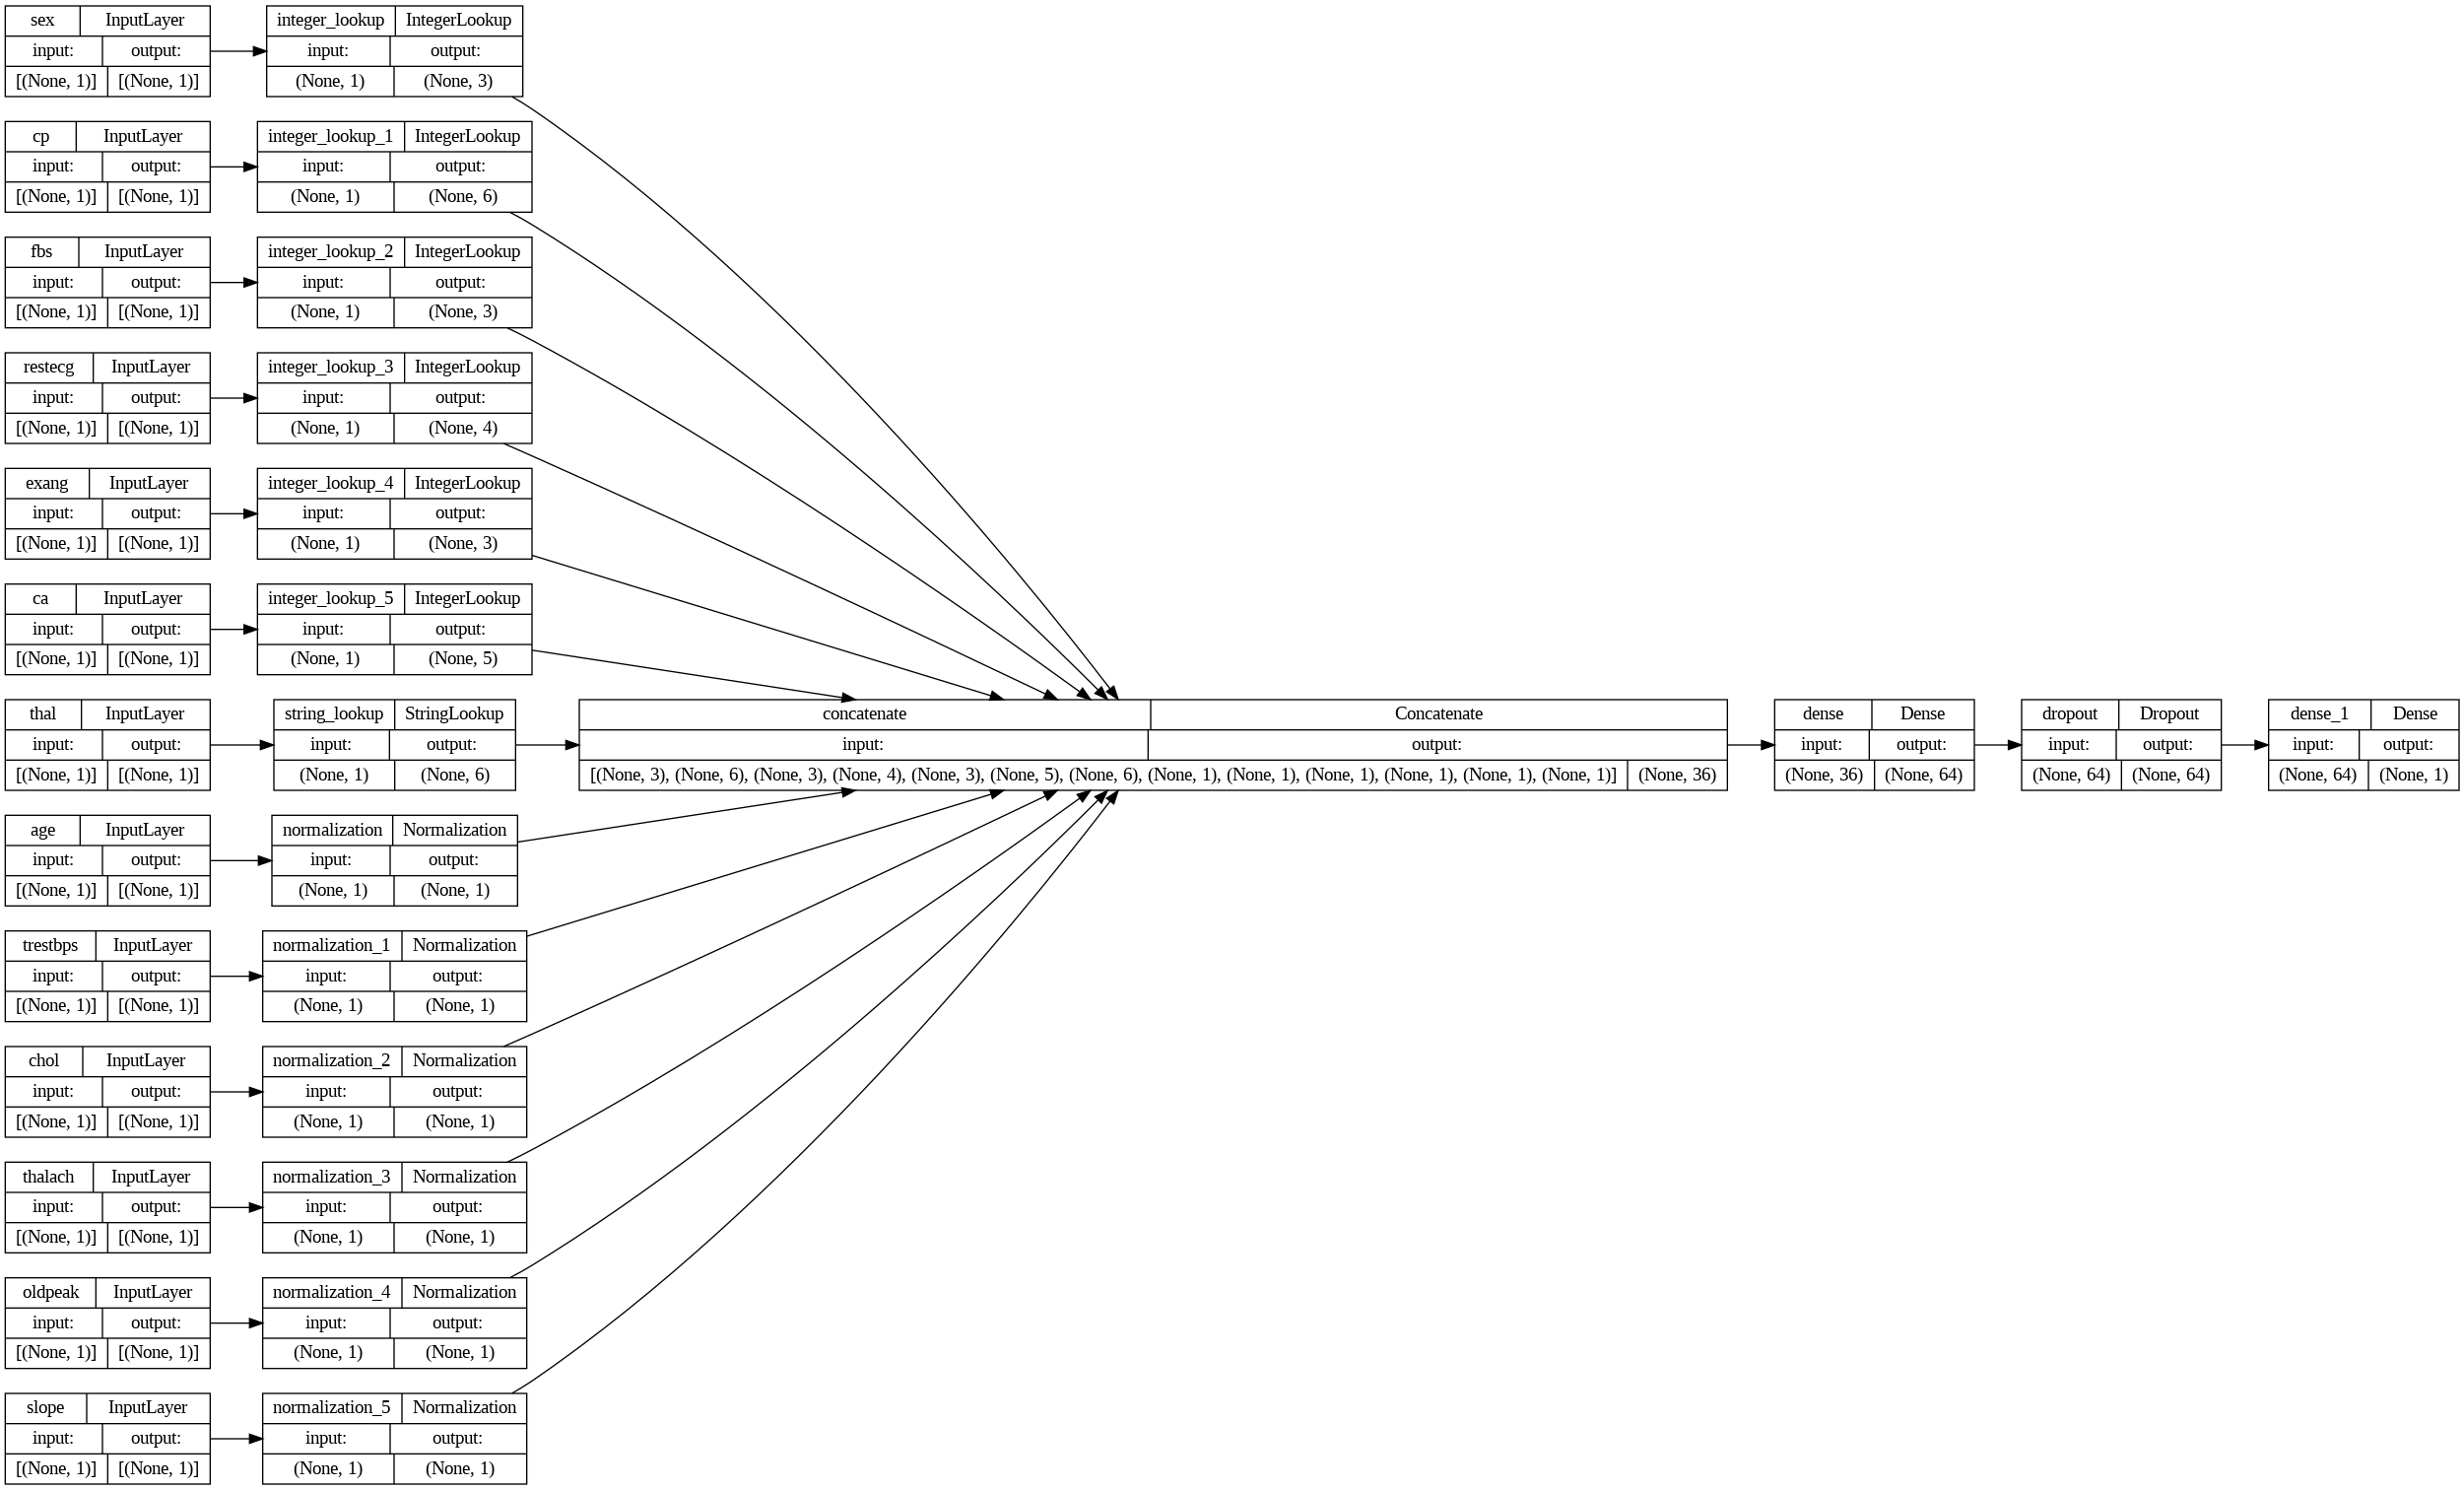

In [21]:
# `rankdir='LR'` is to make the graph horizontal.
## YOUR CODE HERE
keras.utils.plot_model(model,show_shapes=True,rankdir='LR' )

### Train the model

(Change the Colab notebook's runtime to GPU for faster training)

In [26]:
## YOUR CODE HERE
target = train_dataframe['target']
#model.fit(train_ds, target epochs=100, validation_data=val_ds)

history = model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
49/49 [==============================] - 1s 11ms/step - loss: 0.0910 - accuracy: 0.9752 - val_loss: 0.4700 - val_accuracy: 0.8852
Epoch 2/100
49/49 [==============================] - 0s 7ms/step - loss: 0.0969 - accuracy: 0.9793 - val_loss: 0.4722 - val_accuracy: 0.8852
Epoch 3/100
49/49 [==============================] - 0s 7ms/step - loss: 0.1203 - accuracy: 0.9504 - val_loss: 0.4748 - val_accuracy: 0.8852
Epoch 4/100
49/49 [==============================] - 0s 7ms/step - loss: 0.1188 - accuracy: 0.9545 - val_loss: 0.4657 - val_accuracy: 0.8852
Epoch 5/100
49/49 [==============================] - 0s 6ms/step - loss: 0.1003 - accuracy: 0.9628 - val_loss: 0.4720 - val_accuracy: 0.8852
Epoch 6/100
49/49 [==============================] - 0s 7ms/step - loss: 0.1140 - accuracy: 0.9545 - val_loss: 0.4998 - val_accuracy: 0.8852
Epoch 7/100
49/49 [==============================] - 1s 13ms/step - loss: 0.0923 - accuracy: 0.9711 - val_loss: 0.4977 - val_accuracy: 0.8852
Epoch 8/100

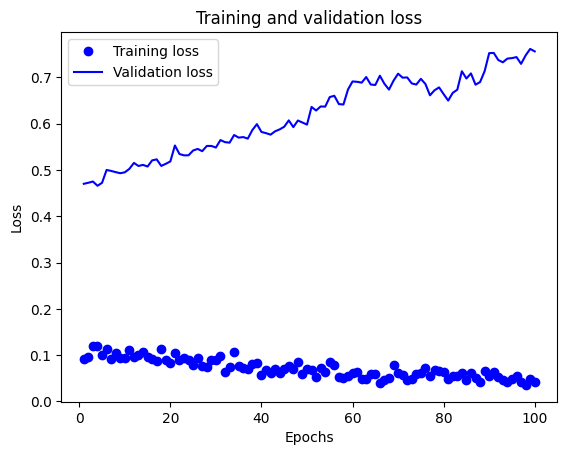

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")

plt.title("Training and validation loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

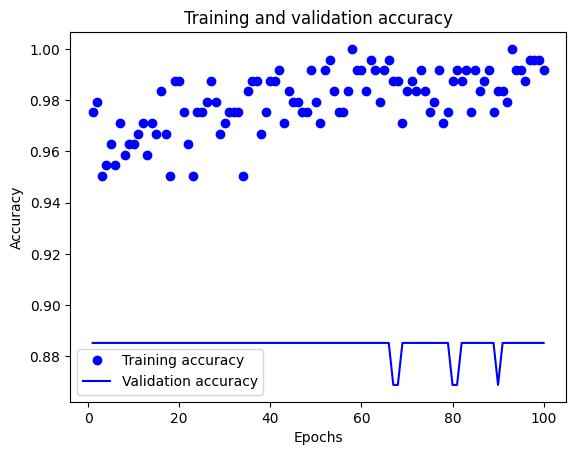

In [36]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")

plt.title("Training and validation accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## Inference on new data [1 Mark]

To get a prediction for a new sample, you can simply call `model.predict()`. There are
just two things you need to do:

1. wrap scalars into a list so as to have a batch dimension (models only process batches
of data, not single samples)
2. Call `convert_to_tensor` on each feature

Note : The predicted output should be either 0  or 1 based on a threshold value of probability 0.5.

In [25]:
## YOUR CODE HERE
sample = {
    "sex": 0,
    "age" : 63,
    "cp" : 1,
    "trestbps": 125,
    "chol": 233,
    "fbs": 0,
    "restecg": 2,
    "thalach": 123,
    "exang": 1,
    "oldpeak": 0.8,
    "slope": 3,
    "ca": 3,
    "thal": "normal"
}
input_dict = {name: tf.convert_to_tensor([value]) for name, value in sample.items()}
predictions = model.predict(input_dict)

## YOUR CODE
print(
    "This particular penguin had a %.1f percent probability "
    "of being healthy, as evaluated by our model." % (100 * predictions[0][0],)
)

1/1 [==============================] - 0s 241ms/step
This particular penguin had a 13.4 percent probability of being healthy, as evaluated by our model.
